# AI: the lab

Perceptrons, an early success, later maligned as a failure
in the AI community, leveraging Monte Carlo methods to learn

# The birth, death, and rebirth of the Monte Carlo Perceptron

Recall the perceptron (we haven't really talked about it,
so this is more of an introduction).

Recall that McCulloch & Pitts, inspired both by Turing's
1936 paper on universal computation but also what
was known about neuron electophysiology at the time,
proposed the first artificial neural net abstraction. They
(incorrectly) claimed that such a network could embody
what we would now call a Turing machine, capable of any
computation.

Later, the psychologist Frank Rosenblatt proposed
a model to instantiate this in a mechanical computer -- not
as "software" but as a specialized piece of electronics
in the same way Claude Shannon's Theseus mouse was a special
purpose computer. ![perceptron](https://i.imgur.com/Xin4gI5.png)

Check out http://www.dtic.mil/docs/citations/AD0256582 for a detailed (>28MB) report.

Rosenblatt considered one output that took many signals
as input. ![logical](https://i.stack.imgur.com/1c2Mb.png)

In a way this is like multivariate regression
as studied by Yule for looking at English poverty at the
end of the 19th century.

The perceptron is an example of what is called "supervised learning," because it learns to classify data based on a "training set" that is already classified. Using a training set of vectors that are each classfied as being on one or the other side of a line, the perceptron learns how to divide such vectors. Ye olde mandatory Wikipedia diagramme: ![wikilinearclassified](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Perceptron_example.svg/1224px-Perceptron_example.svg.png)

He proposed a rule in which one chooses either 1 new
example or chooses one example at random to update the
separating hyper-plane -- the line that separates "+"
from "-" examples as in:
![plusminus](https://camo.githubusercontent.com/8d668489613be0b9435044f224ef32a25ae30d74/687474703a2f2f73656261737469616e72617363686b612e636f6d2f696d616765732f626c6f672f323031352f73696e676c656c617965725f6e657572616c5f6e6574776f726b735f66696c65732f70657263657074726f6e5f62696e6172792e706e67)

The amount that the weights of each "neuron" changes
are determined by walking down a "hill" in the space
of weights, where the hill is higher if you are misclassifying
many examples. The slope of the hill is called its gradient, 
and since this technique chooses an example at
random it's called stochastic gradient descent.

In this way we know we won't get one unique answer;
we might get an answer that's pretty good though.

Not surprisingly, `python` has a robust perceptron implementation in `scikit learn`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron

%matplotlib inline


Let's take the example of a series of x,y coordinates that are classified into two classes. We'll use a pandas data frame, cuz pandas are nice. 

In [2]:
# this example adapted from http://stamfordresearch.com/python-perceptron-re-visited/

A = [2, 1, 2, 5, 7, 2, 3, 6, 1, 2, 5, 4, 6, 5]
B = [2, 3, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 7]
classification = [0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1]

trainingdata = pd.DataFrame({
'A' : A ,
'B' : B ,
'classification' : classification
})

# Targets here means the classification of each point. So (2,2) is 0, and (2,4) is 1


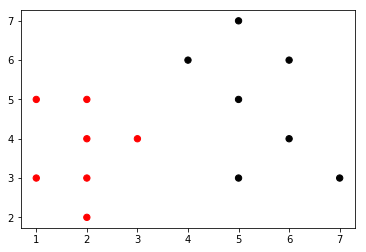

In [3]:
# Let's just graph these, with the points classified as 0 and 1 in different colors

colormap = np.array(['r', 'k'])
 
# Plot the data, A is x axis, B is y axis
# and the colormap is applied based on the classification
plt.scatter(trainingdata.A, trainingdata.B, c=colormap[trainingdata.classification], s=40)

In this case, pretty easy to anticipate that this training set of points could be classified using a line.

A perceptron is one algorithm for 'learning' such a line. In scikit learn, we set up out classifier and then tell it to build a classifier using the training data.

In [4]:
# First, set up the classfier by creating the perceptron object (net)
net = Perceptron(n_iter=100, verbose=0, random_state=None, fit_intercept=True, eta0=0.002)
 
# Then use the training data using the perceptron object (net)
net.fit(trainingdata[['A', 'B']],trainingdata['classification'])

/Users/wiggins/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Perceptron(alpha=0.0001, class_weight=None, eta0=0.002, fit_intercept=True,
      max_iter=None, n_iter=100, n_jobs=1, penalty=None, random_state=None,
      shuffle=True, tol=None, verbose=0, warm_start=False)

Hey, what's my line?

In [5]:
print("Coefficient 0 " + str(net.coef_[0,0]))
print("Coefficient 1 " + str(net.coef_[0,1]))
print("Bias " + str(net.intercept_))

Coefficient 0 0.034
Coefficient 1 -0.016
Bias [-0.038]


Plot the data and the line (the "decision boundary")

(0, 8)

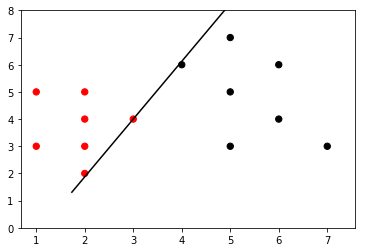

In [6]:

# Plot the original data
plt.scatter(trainingdata.A, trainingdata.B, c=colormap[trainingdata.classification], s=40)
 
# Calc the hyperplane (decision boundary)
ymin, ymax = plt.ylim()
w = net.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(ymin, ymax)
yy = a * xx - (net.intercept_[0]) / w[1]
 
# Plot the hyperplane
plt.plot(xx,yy, 'k-')
plt.ylim([0,8]) # Limit the y axis size

So, based on this trained classifier, we can make predictions about other data. 

Let's consider (7,2) and (2,7)

`net.predict` will use the trained classifier to make a prediction, like so:

In [7]:
pred = net.predict([[7,2],[2,7]])

In [8]:
print(pred)

[1 0]


## Targeted death of the perceptron

Symbolic AI practitioners no friend to neural nets as a research program that might draw funding and computing time away from their efforts. Major technical effort to undermine perceptron as a research program.

> In the middle 1960s Papert and Minsky set out to kill the perceptron, or, at least, to establish its limitations--a task Minsky felt was a sort of social service they could perform for the artificial intelligence community. [quoted in Olazaran, 628]

Minsky noted,

> Part of our drive came . . . from the fact that funding and research energy were being dissapated on . . . misleading attempt to use connectionist methods in practical applications. [ibid, 628]

Other forms of pattern recognition would be the future for AI. 

Many critical complaints, but key one for future research:

Many crucial things not linearly separable, notably the simple logical operation XOR

![xor](http://www.theprojectspot.com/images/post-assets/ls.jpg)


## Rebirth

- multilayer

![multilayer](https://i.imgur.com/E1Pqfbn.png)


https://en.wikipedia.org/wiki/Hacker_koan#Uncarved_block

    In the days when Sussman was a novice, Minsky once came to him as he sat hacking at the PDP-6.

    "What are you doing?", asked Minsky.
    "I am training a randomly wired neural net to play Tic-tac-toe", Sussman replied.
    "Why is the net wired randomly?", asked Minsky.
    "I do not want it to have any preconceptions of how to play", Sussman said.

    Minsky then shut his eyes.
    "Why do you close your eyes?" Sussman asked his teacher.
    "So that the room will be empty."
    At that moment, Sussman was enlightened. 
    
Story told in Levy, *Hackers*
    
    So Sussman began working on a program. Not long after, this odd-looking bald guy came over. Sussman figured the guy was going to boot him out, but instead the man sat down, asking, "Hey, what are you doing?" Sussman talked over his program with the man, Marvin Minsky. At one point in the discussion, Sussman told Minsky that he was using a certain randomizing technique in his program because he didn't want the machine to have any preconceived notions. Minsky said, "Well, it has them, it's just that you don't know what they are." It was the most profound thing Gerry Sussman had ever heard. And Minsky continued, telling him that the world is built a certain way, and the most important thing we can do with the world is avoid randomness, and figure out ways by which things can be planned. Wisdom like this has its effect on seventeen-year-old freshmen, and from then on Sussman was hooked.

- SGD
